In [50]:
import pickle 

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes=True)
import pandas as pd
import numpy as np

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [52]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

In [53]:
with open('df.pickle','rb') as read_file:
    df = pickle.load(read_file)
df = df.astype(int)

In [54]:
# 归一化
for i in df.columns:
    df[i] = (df[i] - df[i].mean()) / (df[i].std())
    # df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [55]:
# 归一化
# transform features to follow a uniform or normal distribution
# from sklearn.preprocessing import QuantileTransformer
# x=df
# columns = x.columns
# quantile  = QuantileTransformer()
# X = quantile.fit_transform(x)
# df_new=quantile.transform(X)
# df_new=pd.DataFrame(X)
# df_new.columns = columns
# df_new.head()

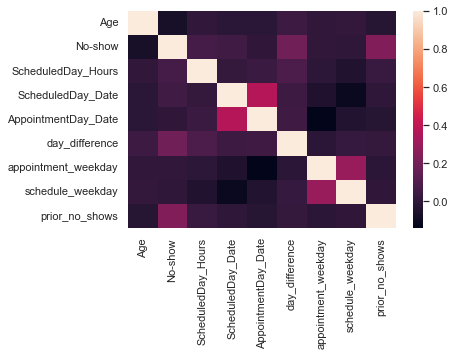

In [56]:
corr = df.corr()
sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns)
plt.show()

In [57]:
y = df.pop('No-show').astype(int)
X = df.copy().astype(int)

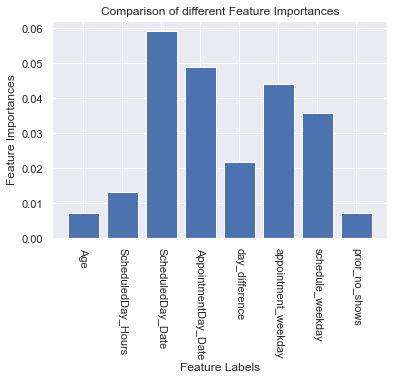

In [58]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
extra_tree_forest.fit(X, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in \
                                        extra_tree_forest.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.bar(df.columns, feature_importance_normalized)
plt.xticks(rotation=270)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=10)

In [60]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [61]:
best_model= nbModel_grid.fit(X_train, y_train)
# naive_bayes = MultinomialNB()

 
#Predict on test data
y_predicted_bayes = best_model.predict(X_test)

m = metrics.confusion_matrix(y_predicted_bayes , y_test)
print("the accuracy of this model is: ",
      metrics.accuracy_score(y_predicted_bayes , y_test))
print("The confusion matrix of Naive Bayes is: ", "\n", m)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
the accuracy of this model is:  0.8149178661244583
The confusion matrix of Naive Bayes is:  
 [[14553  3069]
 [  390   677]]


In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

print("Classification Report is:\n",classification_report(y_test, y_predicted_bayes))
print("\n F1:\n",f1_score(y_test,y_predicted_bayes))
print("\n Precision score is:\n",precision_score(y_test,y_predicted_bayes))
print("\n Recall score is:\n",recall_score(y_test,y_predicted_bayes))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89     14943
           1       0.63      0.18      0.28      3746

    accuracy                           0.81     18689
   macro avg       0.73      0.58      0.59     18689
weighted avg       0.79      0.81      0.77     18689


 F1:
 0.28132142115104924

 Precision score is:
 0.6344892221180881

 Recall score is:
 0.1807261078483716


the auc of this model is 0.5773134654881287


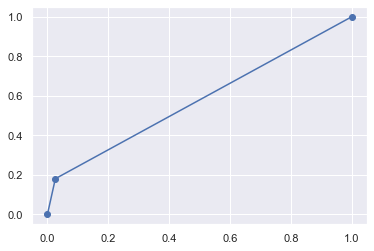

In [63]:
fpr_bayes, tpr_bayes, thresold_bayes = metrics.roc_curve(y_test, y_predicted_bayes)
AUC = metrics.auc(fpr_bayes, tpr_bayes)
print(f"the auc of this model is {AUC}")
plt.figure()
plt.plot(fpr_bayes, tpr_bayes, marker="o")
plt.show()

In [64]:
# svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
# svm.fit(X_train, y_train)
# y_predicted_svm = svm.predict(X_test)

# m = metrics.confusion_matrix(y_predicted_svm , y_test)
# print("The confusion matrix of SVM is: ", "\n", m)

In [65]:
# fpr_svm, tpr_svm, thresold_svm = metrics.roc_curve(y_test, y_predicted_svm)
# AUC = metrics.auc(fpr_svm, tpr_svm)
# print(f"the auc of this model is {AUC}")
# plt.figure()
# plt.plot(fpr_svm, tpr_svm, marker="o")
# plt.show()

In [66]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
 
#Fitting the data to the classifier
decision_tree.fit(X_train, y_train)
y_predicted_tree = decision_tree.predict(X_test)

m = metrics.confusion_matrix(y_predicted_tree , y_test)
print("the accuracy of this model is: ",
      metrics.accuracy_score(y_predicted_tree , y_test))
print("the confusion matrix of decision tree is: ", "\n", m)

the accuracy of this model is:  0.8111188399593343
the confusion matrix of decision tree is:  
 [[14526  3113]
 [  417   633]]


In [67]:
print("Classification Report is:\n",classification_report(y_test, y_predicted_tree))
print("\n F1:\n",f1_score(y_test,y_predicted_tree))
print("\n Precision score is:\n",precision_score(y_test,y_predicted_tree))
print("\n Recall score is:\n",recall_score(y_test,y_predicted_tree))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     14943
           1       0.60      0.17      0.26      3746

    accuracy                           0.81     18689
   macro avg       0.71      0.57      0.58     18689
weighted avg       0.78      0.81      0.77     18689


 F1:
 0.26396997497914926

 Precision score is:
 0.6028571428571429

 Recall score is:
 0.16898024559530164


the auc of this model is 0.5705371013160206


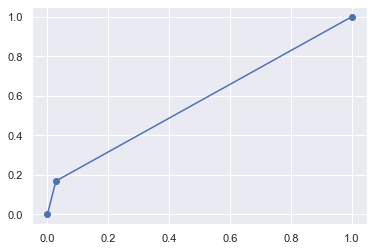

In [68]:
fpr_tree, tpr_tree, thresold_bayes = metrics.roc_curve(y_test, y_predicted_tree)
AUC = metrics.auc(fpr_tree, tpr_tree)
print(f"the auc of this model is {AUC}")
plt.figure()
plt.plot(fpr_tree, tpr_tree, marker="o")
plt.show()

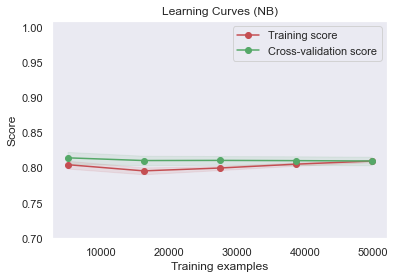

In [70]:
title = r"Learning Curves (NB)"
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)
plot_learning_curve(naive_bayes, title, X, y, ylim=(0.7, 1.01), cv=None, n_jobs=1)
plt.show()

In [71]:
# title = r"Learning Curves (SVM)"
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)
# plot_learning_curve(svm, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=1)
# plt.show()

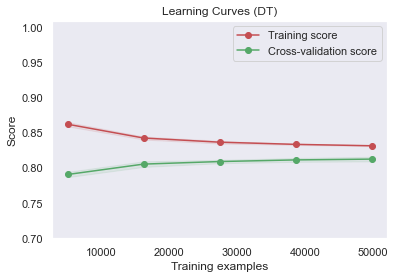

In [72]:
title = r"Learning Curves (DT)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)
plot_learning_curve(decision_tree, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=1)
plt.show()